In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering

In [27]:
math = pd.read_csv('data/student-mat.csv')
port = pd.read_csv('data/student-por.csv')
data = pd.concat([math, port]).reset_index().drop(columns=['index'])

#More than 3 family size feature
data['gt3_famsize'] = data['famsize'].map({'GT3': 1, 'LE3': 0})
data = data.drop(columns=['famsize'])

In [28]:
def map_binary(val):
    return 1 if (val == 'yes') else 0

cols_to_map = ['schoolsup', 'famsup', 'romantic', 'paid', 'activities', 'nursery', 'higher', 'internet']

data[cols_to_map] = data[cols_to_map].applymap(map_binary)

In [29]:
#Parents living together feature
data['Pstatus'] = data['Pstatus'].map({'A': 0, 'T': 1})

#Living in a city feature
data['urbanite'] = data['address'].map({'U': 1, 'R': 0})
data = data.drop(columns=['address'])

In [119]:
def categorize_grades(value):
    if round(value) in range(0, 8): 
        return 'Bad'
    elif round(value) in range(8, 12):
        return 'Satisfactory'
    elif round(value) in range(12, 15):
        return 'Good'
    else:
        return 'Excellent' 

In [120]:
#Total alcohol consumption
data['Talc'] = data['Walc'] + data['Dalc']

In [121]:
#Average grade feature
data['avg_grade'] = data[['G1', 'G2', 'G3']].mean(axis=1)
pd.set_option('display.max_columns', None)

#Categorize students by their avg grade
data['grade_cat'] = data['avg_grade'].apply(categorize_grades)

display(data)

,school,sex,age,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gt3_famsize,urbanite,avg_grade,grade_cat,Talc
0,GP,F,18,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,1,5.666667,Bad,2
1,GP,F,17,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,1,5.333333,Bad,2
2,GP,F,15,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0,1,8.333333,Satisfactory,5
3,GP,F,15,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,1,14.666667,Excellent,2
4,GP,F,16,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,1,8.666667,Satisfactory,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,1,2,3,services,other,course,mother,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10,1,0,10.333333,Satisfactory,3
1040,MS,F,18,1,3,1,teacher,services,course,mother,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16,0,1,15.333333,Excellent,2
1041,MS,F,18,1,1,1,other,other,course,mother,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9,1,1,10.666667,Satisfactory,2
1042,MS,M,17,1,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0,1,10.000000,Satisfactory,7


Distribution of the grade averages looks like normal

# Visualisation of some stats

### Female and male count

F    591
M    453
Name: sex, dtype: int64


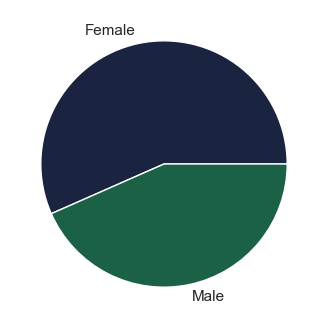

In [32]:
print(data['sex'].value_counts())
sns.set(rc={'figure.figsize':(7, 4)})
plt.pie(data['sex'].value_counts(), colors=sns.color_palette('cubehelix'), labels=['Female', 'Male']);

More females than males

### Ages and sexes countplot

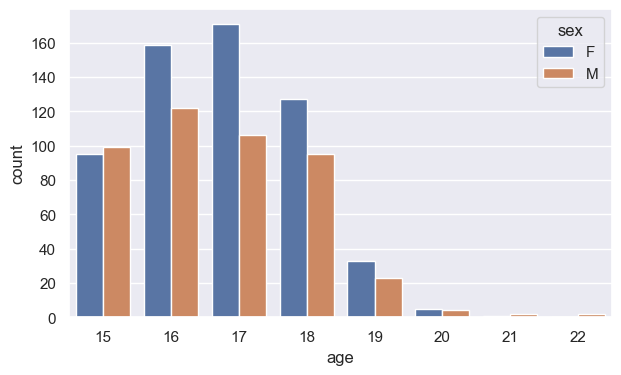

In [33]:
sns.countplot(x='age', hue='sex', data=data);

Much more data about people below age 19

### Alcohol consumption for each gender

In [11]:
data.groupby(['sex'])[['Dalc', 'Walc']].describe()

Dalc                                                Walc            \
     count      mean       std  min  25%  50%  75%  max  count      mean   
sex                                                                        
F    591.0  1.274112  0.637253  1.0  1.0  1.0  1.0  5.0  591.0  1.944162   
M    453.0  1.781457  1.114431  1.0  1.0  1.0  2.0  5.0  453.0  2.728477   

                                        
          std  min  25%  50%  75%  max  
sex                                     
F    1.056984  1.0  1.0  2.0  3.0  5.0  
M    1.415467  1.0  1.0  3.0  4.0  5.0

On average, male individuals consume more alcohol than female ones.
Weekend alcohol consumption on average is more than workdays.

### Grades distribution and correlation with alcohol consumption for each category

In [122]:
from scipy.stats import shapiro

def check_normality(data):
    sampled = [np.random.choice(data, 100) for _ in range(100)]
    means = [np.mean(sampled[i]) for i in range(100)]
    _, p = shapiro(means)
    print(f'Data is not normally distributed, p-value = {p}') if p <= 0.05 else print(f'Data is normally distributed, p-value = {p}')

Data is not normally distributed, p-value = 0.043702855706214905
Data is normally distributed, p-value = 0.32593896985054016
Data is normally distributed, p-value = 0.35451826453208923


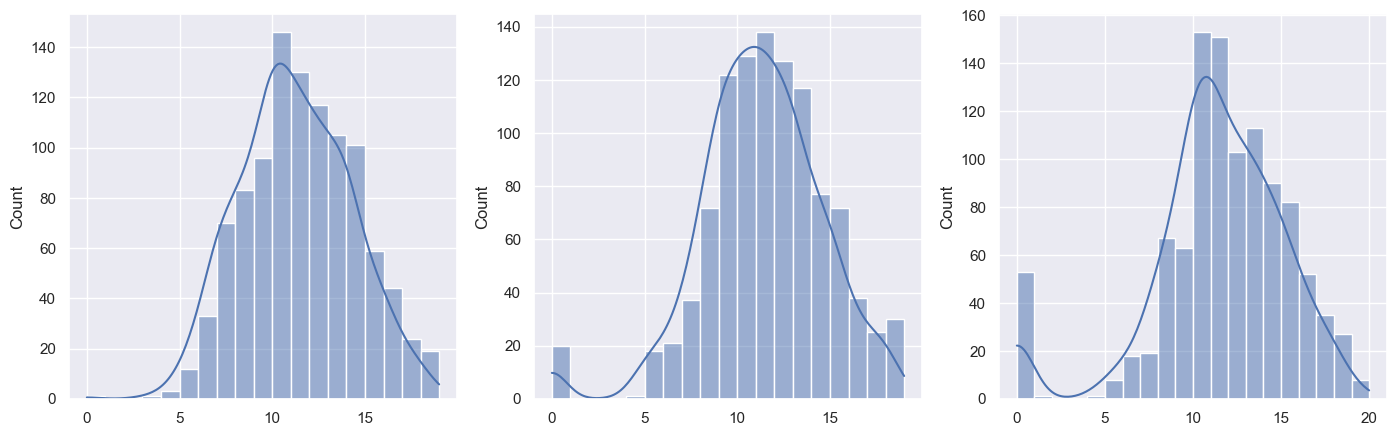

In [123]:
def plot_grades(features: pd.Index):
    i = 0
    samples = np.array([[]], dtype='float64')
    fig, ax = plt.subplots(1, 3, figsize=(17, 5))
    
    for feature in features.columns:
        # samples = np.array([np.random.choice(data[feature], size=50) for _ in range(100)]).flatten()
        check_normality(np.array(data[feature]))
        sns.histplot(np.array(data[feature]), ax=ax[i], kde=True, binwidth=1)
        i += 1
    
plot_grades(data[['G1', 'G2', 'G3']])

From Shapiro-Wilk test we can conclude that all grades are not normally distributed.

Data is normally distributed, p-value = 0.3438432514667511


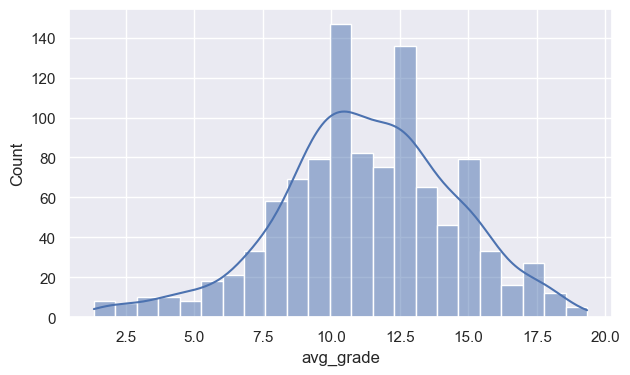

In [124]:
check_normality(data['avg_grade'])
sns.histplot(data['avg_grade'], kde=True);

In [147]:
bad_grades = data[data['grade_cat'] == 'Bad']
satisf_grades = data[data['grade_cat'] == 'Satisfactory']
good_grades = data[data['grade_cat'] == 'Good']
excellent_grades = data[data['grade_cat'] == 'Excellent']

categorized_data = [bad_grades, satisf_grades, good_grades, excellent_grades]

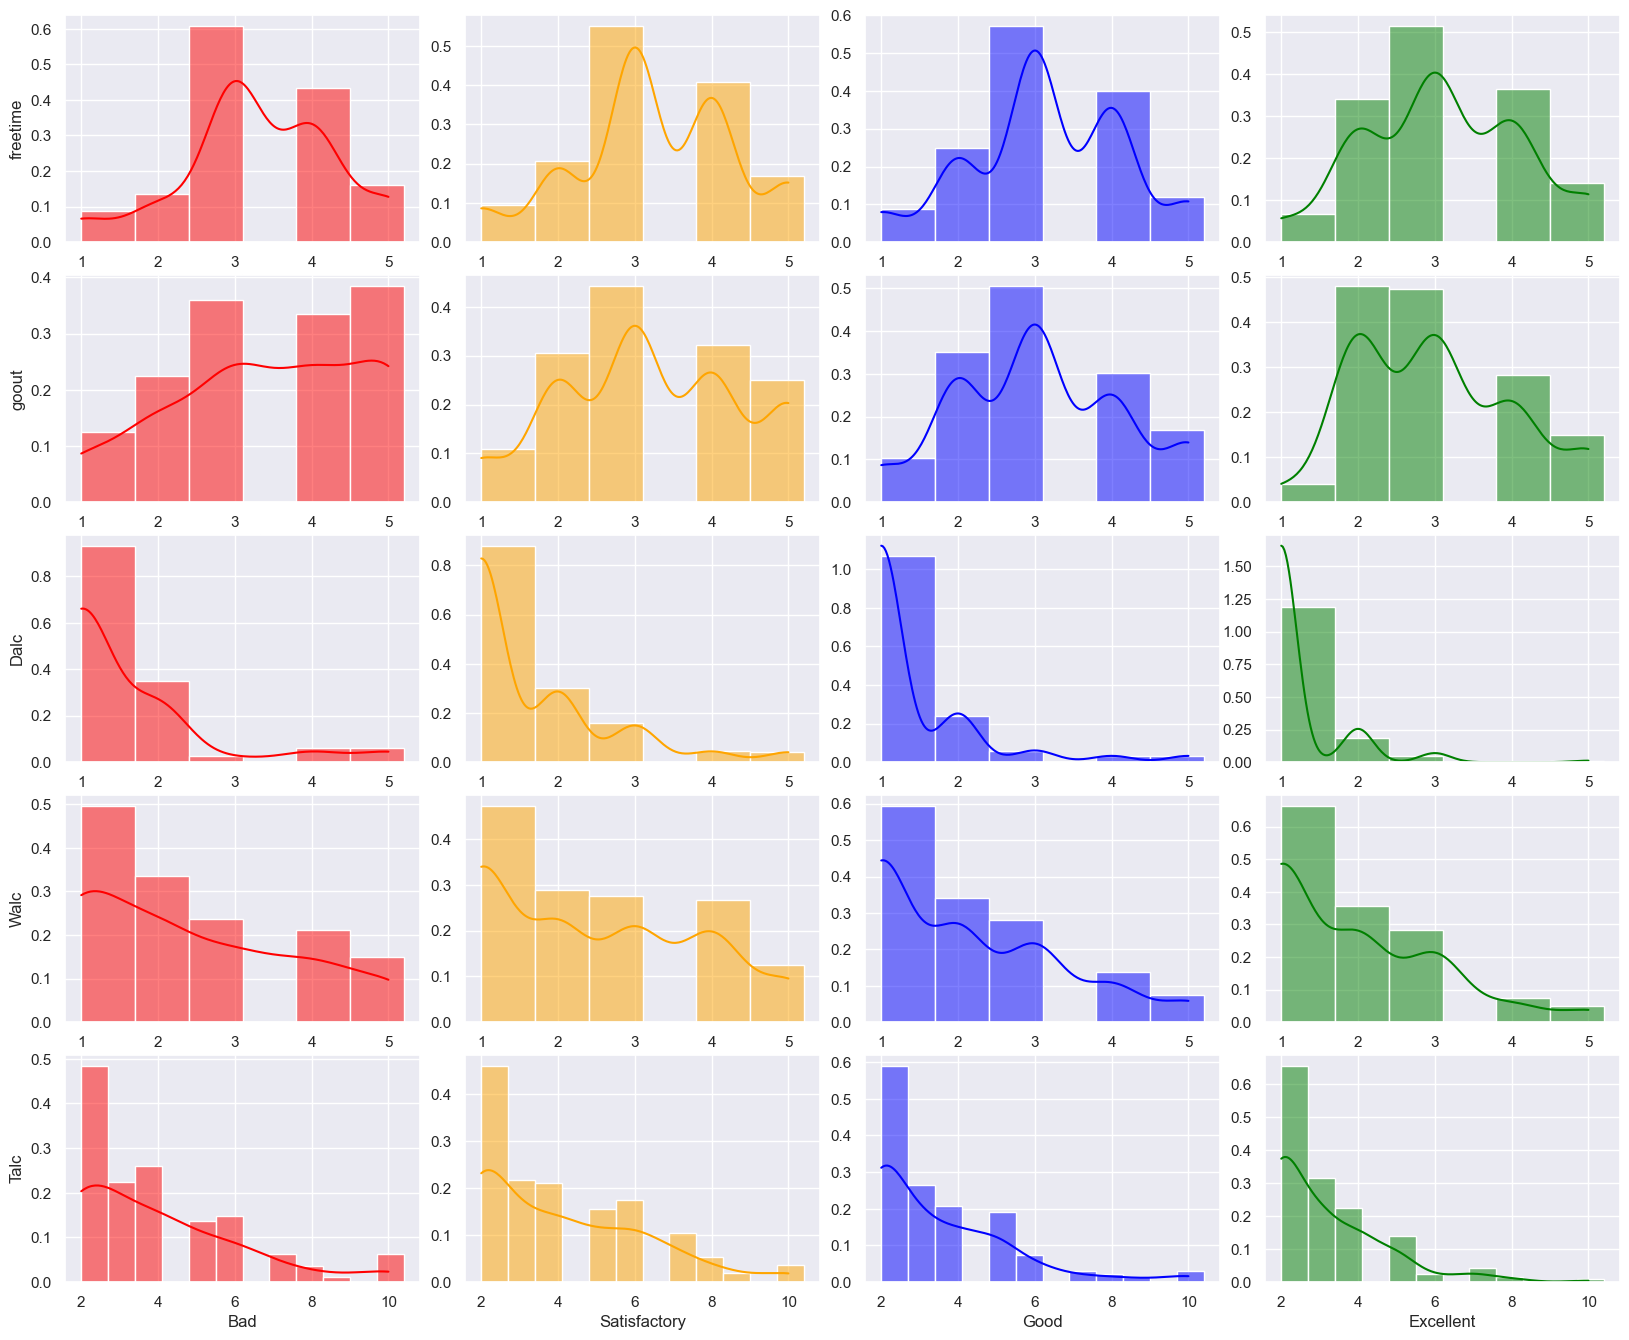

In [127]:
cols = ['freetime', 'goout', 'Dalc', 'Walc', 'Talc']
fig, ax = plt.subplots(5, 4, figsize=(16, 13))
plt.tight_layout(pad=0)


for i in range(len(categorized_data)):
    j = 0
    
    if i == 0:
        clr = 'red'
    elif i == 1:
        clr = 'orange'
    elif i == 2:
        clr = 'blue'
    else:
        clr = 'green'
    
    for col in cols:
        sns.histplot(categorized_data[i][col], ax=ax[j][i], color=clr, alpha=0.5, binwidth=0.7, kde=True, stat='density')
        if j == 4:
            ax[j][i].set(xlabel=categorized_data[i]['grade_cat'].values[0])
            
        if i == 0:
            ax[j][i].set(ylabel=col)
        else:
            ax[j][i].set(ylabel='')
            
        j += 1
        

# Feature correlation heatmap
### Pearson correlation heatmap

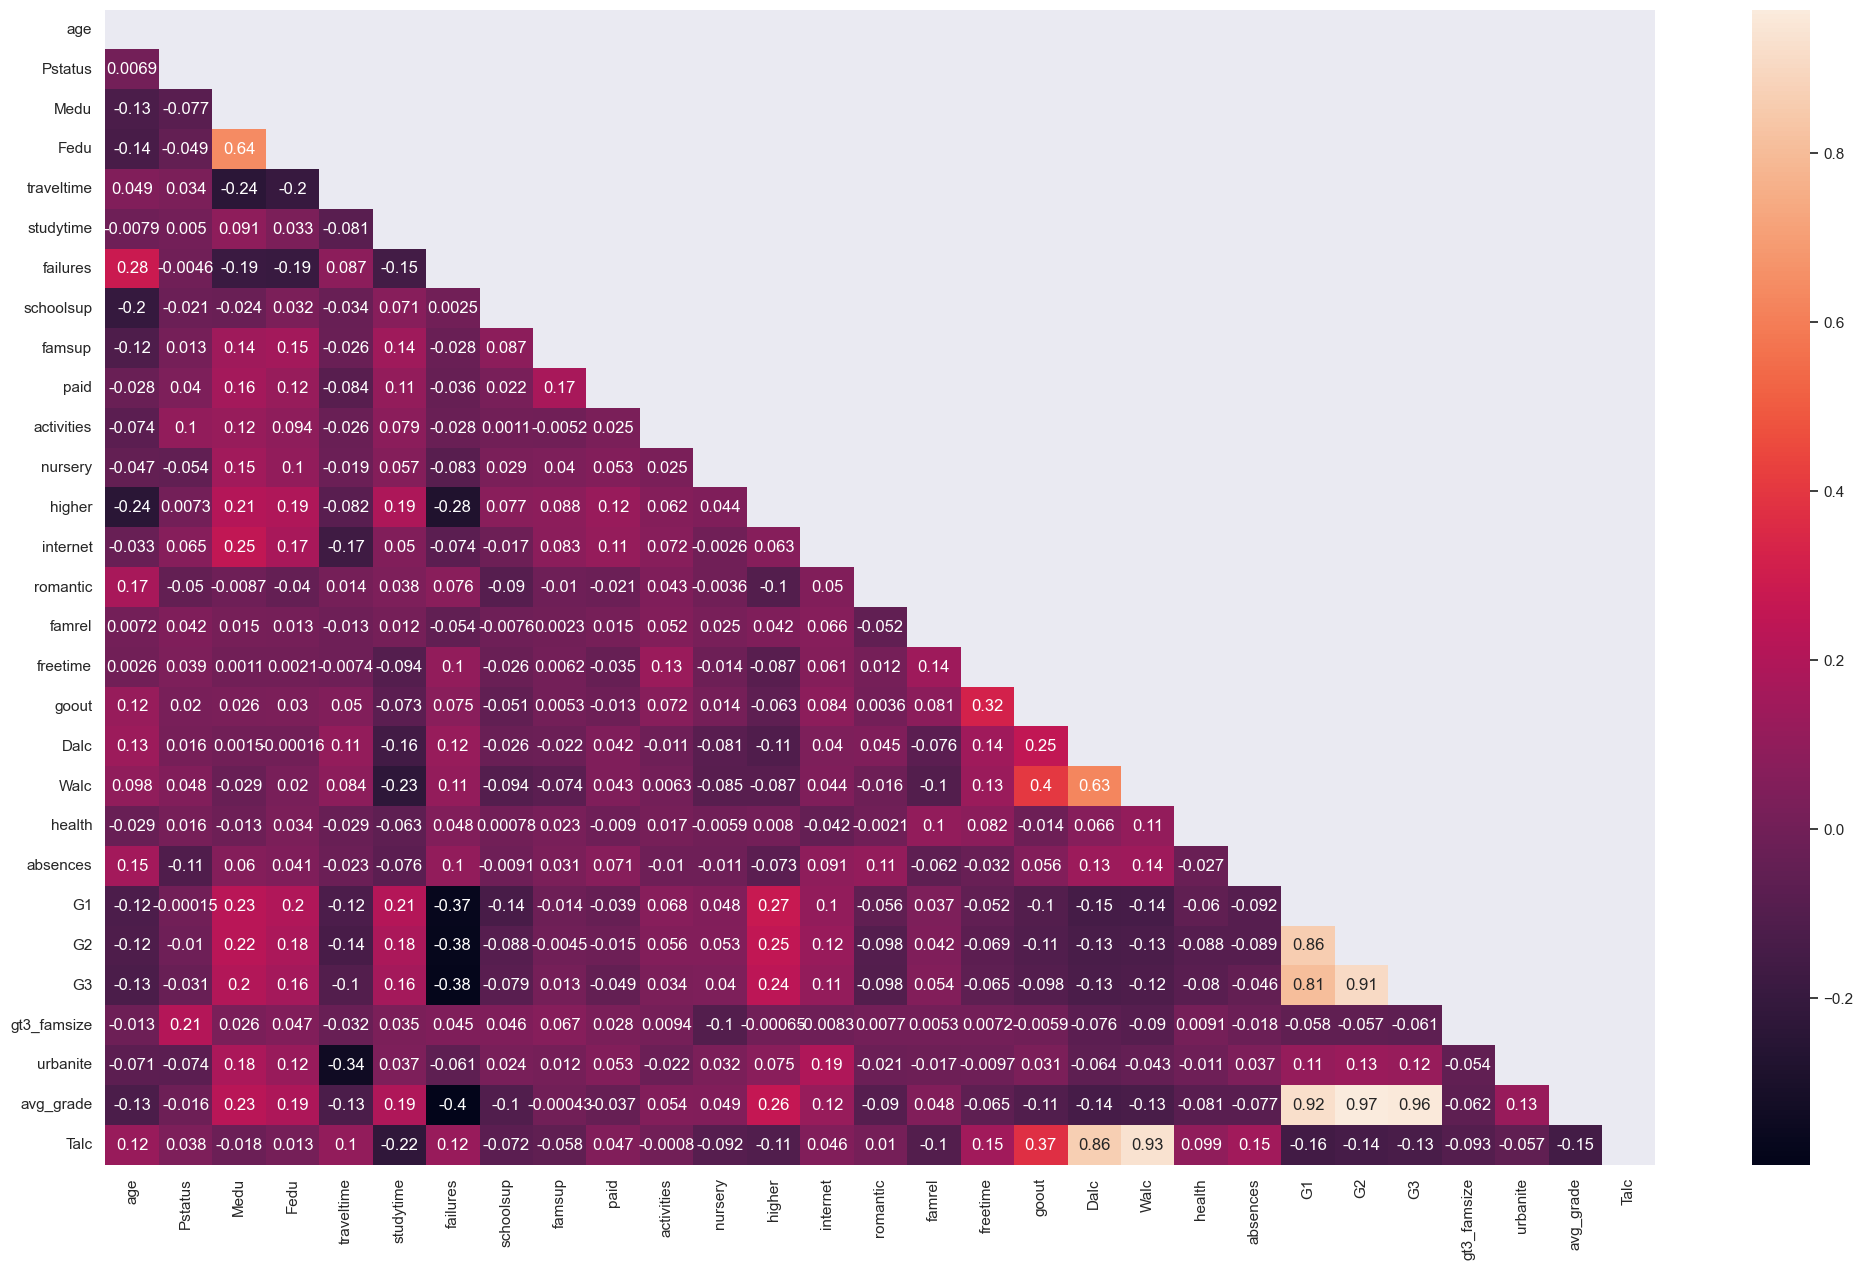

In [159]:
mask = np.zeros_like(data.corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize':(25, 15)})
sns.heatmap(data.corr(numeric_only=True, method='pearson'), annot=True, mask=mask);

### Kendall correlation heatmap

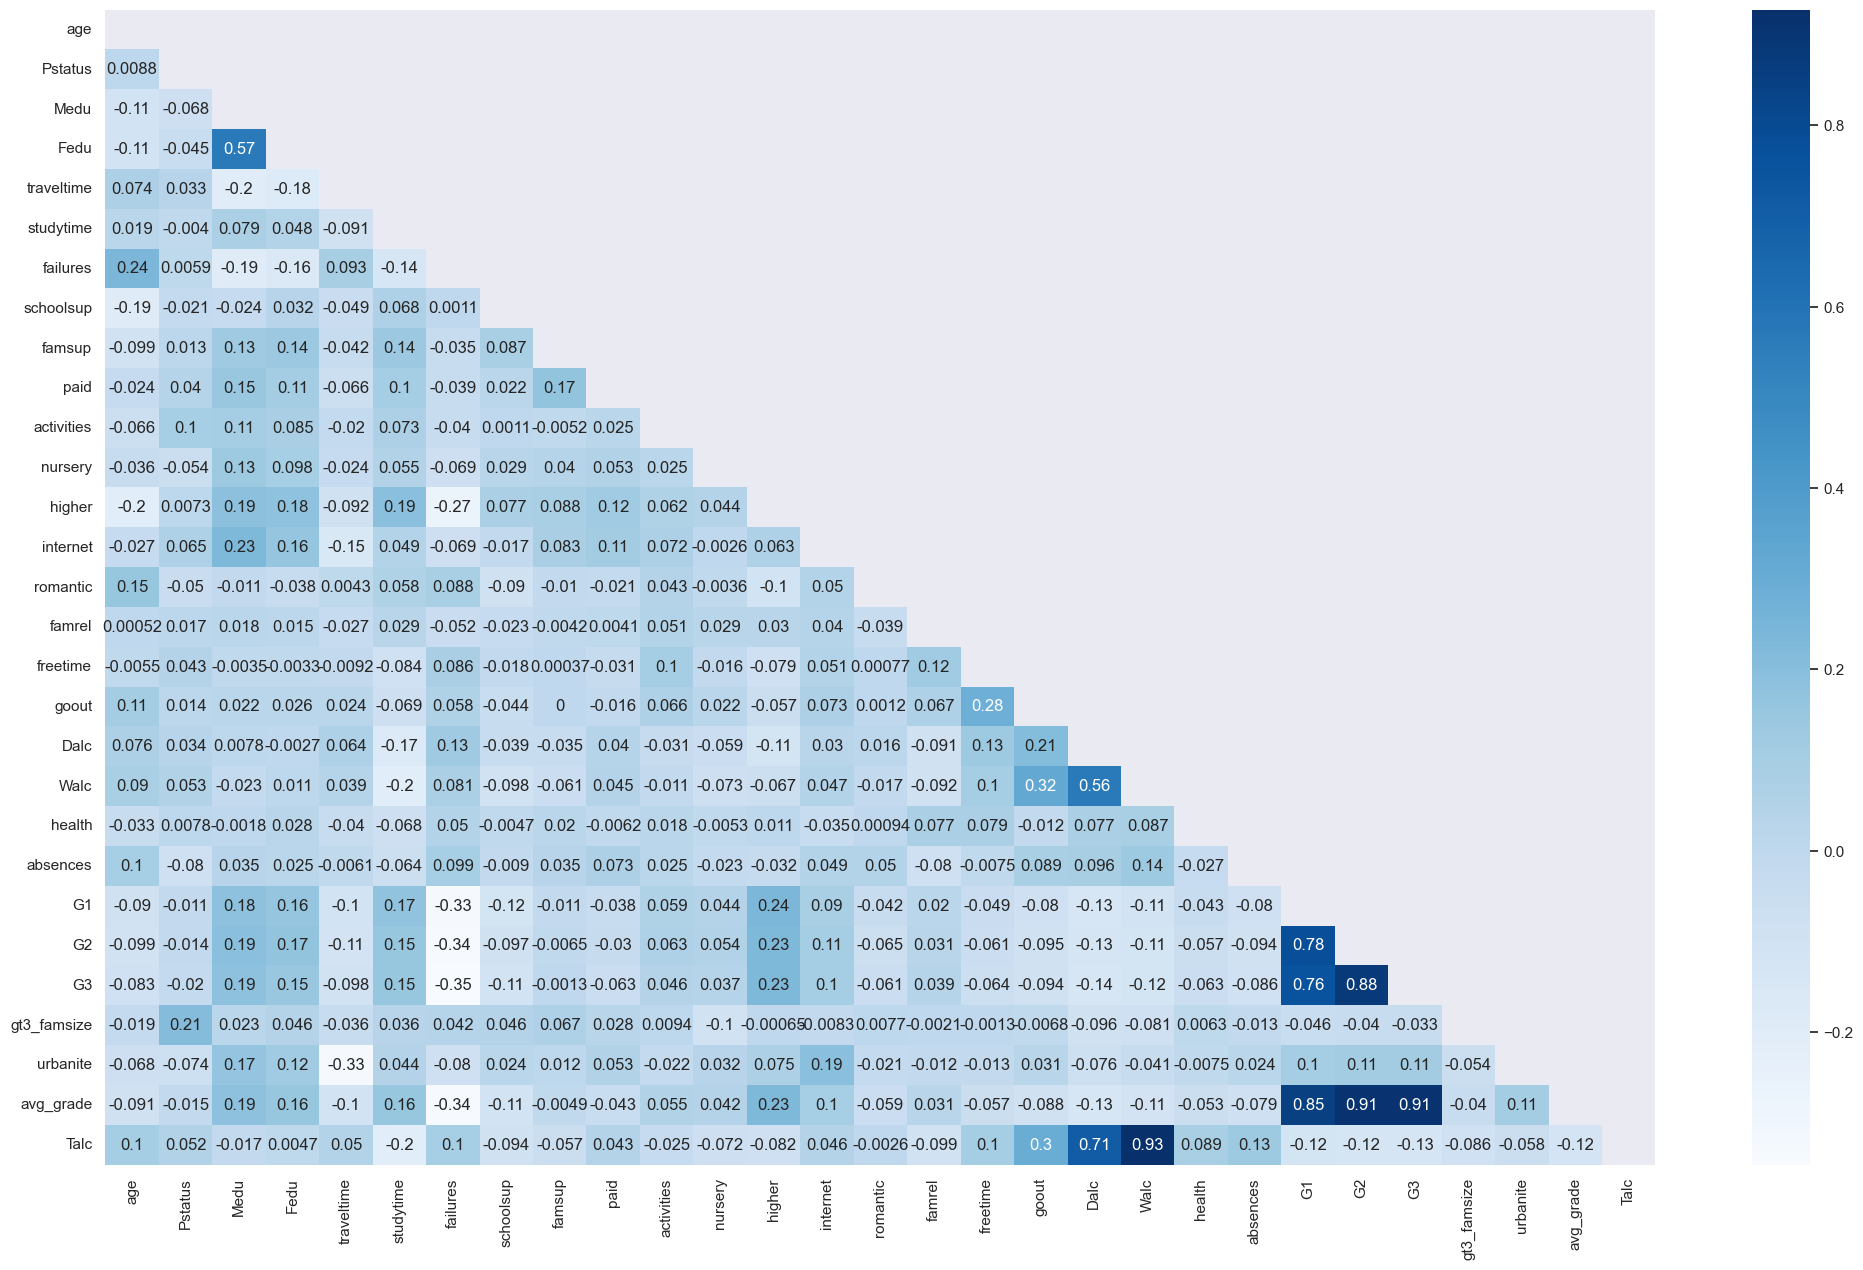

In [158]:
mask = np.zeros_like(data.corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize':(25, 15)})
sns.heatmap(data.corr(numeric_only=True, method='kendall'), annot=True, mask=mask, cmap='Blues');

- Academic grades are highly correlated between each other. 
- Alcohol consumption highly depends on how much person goes out, which depends on the free time that individual has.
- Workdays alcohol consumption highly correlates with weekend alcohol consumption, and vice versa.

# Hypothesis testing

In [152]:
from scipy.stats import levene

def compare_variances(*samples):
    _, p = levene(*samples)
    print(f"Variances are not the same, pvalue={p}") if p < 0.05 else print(f"Variances are the same, pvalue={p}")

### Hypothesis 1
#### Are the average consumptions of alcohol the same for students with different grades
#### H0: All the means of the groups are the same
#### H1: Some group is different

In [148]:
categorized_data = [cat.Talc for cat in categorized_data]

In [153]:
for cat in categorized_data:
    check_normality(cat)

Data is normally distributed, p-value = 0.667675793170929
Data is normally distributed, p-value = 0.9146149754524231
Data is normally distributed, p-value = 0.22834736108779907
Data is normally distributed, p-value = 0.8433639407157898


In [156]:
compare_variances(bad_grades.Talc, satisf_grades.Talc, good_grades.Talc, excellent_grades.Talc)

Variances are not the same, pvalue=1.127644091700927e-08


In [181]:
from scipy.stats import f_oneway

stat, p = f_oneway(bad_grades.Talc, satisf_grades.Talc, good_grades.Talc, excellent_grades.Talc)
print(f'Test statistic is: {stat}. p-value is {p}');

Test statistic is: 13.030159062071338. p-value is 2.3346302890999006e-08


##### p-value is less than 0.05, therefore reject H0

#### Conclusion: Consumption of alcohol differs for these groups

### Hypothesis 2
#### According to correlation heatmap, total alcohol consumtion is relatively correlated to how much student goes out. Are students with excellent grades go out less than students with bad grades?
#### H0: Students with excellent grades go out less than students with bad grades($\mu_1$ < $\mu_2$)
#### H1: $\mu_1$ $\ge$ $\mu_2$

In [162]:
check_normality(bad_grades.goout)
check_normality(excellent_grades.goout)

Data is normally distributed, p-value = 0.6763280034065247
Data is normally distributed, p-value = 0.2716030478477478


In [163]:
compare_variances(bad_grades.goout, excellent_grades.goout)

Variances are not the same, pvalue=0.0011727760247914833


In [180]:
from scipy.stats import ttest_ind

T, p = ttest_ind(excellent_grades.goout, bad_grades.goout, alternative='greater')
print(f'Test statistic is: {T}. p-value is {p}');

Test statistic is: -3.144968115397393. p-value is 0.9990816989439281


##### p-value is significantly more than 0.05, therefore can't reject H0
#### Conclusion: Students with excellent grades go out less than students with bad grades

### Hypothesis 3
#### Are countryside students tend to drink more alcohol than urbanites
#### H0: Students who live in the urban areas consume less alcohol than those in countryside($\mu_1$ < $\mu_2$)
#### H1: $\mu_1$ $\ge$ $\mu_2$

In [172]:
urban = data[data.urbanite == 1]
countryside = data[data.urbanite == 0]

In [174]:
check_normality(urban.Talc)
check_normality(countryside.Talc)

Data is normally distributed, p-value = 0.3895519971847534
Data is normally distributed, p-value = 0.6891926527023315


In [175]:
compare_variances(urban.Talc, countryside.Talc)

Variances are the same, pvalue=0.14134132644170025


In [179]:
T, p = ttest_ind(urban.Talc, countryside.Talc, alternative='greater')
print(f'Test statistic is: {T}. p-value is {p}');

Test statistic is: -1.855983450977385. p-value is 0.968130960066407


##### p-value is significantly more than 0.05, therefore can't reject H0

#### 